# 085.PCA (Principal Component Analysis)

- PCA는 Karl Pearson이 1901 년에 발명한 통계 기법으로 직교 변환을 사용하여 변수 집합을 주성분이라고 하는 선형적으로 상관되지 않은 변수 집합으로 매핑.

- PCA는 원래 데이터세트의 공분산 행렬의 SVD(Singular Value Decomposition)를 기반으로 한다. 이러한 분해(decomposition)의 고유 벡터는 회전변환 행렬(rotation matrix)로 사용된다. 고유 벡터는 설명된 분산에 따라 내림차순으로 회전변환 행렬에 배열.

- PCA는 단순한 공간 변환, 차원 감소 및 스펙트럼 정보로부터의 혼합물 분리에 이르기까지 다양한 응용 분야에서 강력한 기술로 사용 --> 데이터를 어떤 엑셀 형태의 매트릭스 정보로만 정리할 수 있으면 거의 모든 매트릭스 형태에다 적용할 수 있는 그런 굉장히 광범위한 그런 기법이여서 통 넓게 쓰임

--> PCA를 쓰는 이유 : 정보 손실은 최소화하면서 차원을 축소하기 위해서 

- "ChurnData.csv"의 각 행은 고객을 나타내고 각 열은 고객의 속성 표시
- 고객이 가진 28개의 특성을 쭉 보고 이 사람이 탈회를 할거냐 말거냐를 판단
- 정답 데이터를 빼면 27개의 피처를 가지고 정답을 알아맞춰야하는데 시각화가 불가능
  --> 할 수 있는 시각화의 최대는 3차원!! ,색깔로 2차원 공간상에 배치해서 색깔로 구분
  --> 그래서 2차원으로 축소를 해서 시각화를 해보려고 한다

- 데이터 세트에는 지난달에 탈회한 고객에 대한 정보가 포함 (Churn 1.0 - 탈회, 0.0 - 유지)
  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('datasets/ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
df.shape

(200, 28)

In [5]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [7]:
columns = df.columns[:-1] # 마지막 열을 불 포함, 만약에 다 포함하고 싶으면 df.colums[:]
columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat'],
      dtype='object')

In [14]:
# loc, iloc 차이 : loc로 할 경우에는 우리가 칼럼 이름을 직접 정해준다, 전체 레코드 다에 대해서
# iloc는 인덱스로 지정해주는거임!! 이름이 아니라 
X = df.loc[:,columns] 
y = df.loc[:,'churn']
X.shape, y.shape

((200, 27), (200,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 27), (40, 27), (160,), (40,))

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### PCA 적용 전 Logistic Regression

- PCA 적용 후의 결과와 비교 목적
- 27개를 다 가지고 예측을 했을 때하고 그것을 2개의 주성분으로 압축을 해서 차원축소를 해서 예측을 했을 때 별로 정확도가 차이가 많이 안 나면 우리는 정보 손실이 거의 없이 27차원이 2차원으로 압축이 된거임!! --> 이걸 비교해보기 위해서 PCA로 차원 축소하기 전 후에 이진 분류 모델을 각각 만들어서 각각의 정확도를 비교해보자
- 2차원으로 줄여지면 시각화도 해보자

In [22]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.775

### PCA 적용

- 27 개의 feature 를 2 개로 차원 축소  


- components_
    - array, shape (n_components, n_features)
    - n_feature dimension 공간에서의 주성분 축  
    - data 의 분산을 최대로 보존하는 방향
    - explained_variance_ 에 순서대로 정렬되어 있음
--> PCA가 어떻게 적용되는지, 그래서 27개가 어떻게 2개의 차원으로 축소되는데 그 비중이 어떤 비중으로 축소되는지 그런 정보가 다 나와서 그걸로 분석하면 된다. 
    
- explained_variance_  
    - shape (n_components,)  
    - 선택한 각 구성 요소에서 설명하는 분산의 양  
    
- explained_variance_ratio_   
    - shape (n_components,)
    - 선택한 각 구성 요소가 설명하는 분산의 백분율입니다.

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
# PCA라는 함수가 Xtrain이라고 하는 데이터 27개의 피처를 가진 데이터를 분석을 해서 
# 거기에서 보면 각각 차원 27개의 축을 가진 다차원 공간이 선형대수적으로 표현이 될것임
# --> 그 다차원 공간에 있는 축들의 공분산, 그래서 분산이 최대화되는 그 축, 
# 분산이 최대화되는 곳이 정보가 최대한 보존되는 것임.
X_train_pca = pca.fit_transform(X_train) #SCD 기법을 적용해서 실제로 두 개의 행렬을 출력
X_test_pca = pca.transform(X_test) # 여기선 transform만 해준다!! 
# fit을 하면 다른 공분산을 계산 , 그럼 다른 분포를 가진, 다른 데이터가 된다

In [27]:
X_train_pca.shape, X_test_pca.shape

((160, 2), (40, 2))

In [28]:
# attribute : 2개로 축소하기로 했으면 주성분 shape이 2,27 이렇게 나온다!!
# --> 두 개의 주성분에 대해서 각각의 피처들이 몇 퍼센트씩 기여를 했는지 최대 분산의 방향이 저장
# explained variance : 설명된 분산의 합 --> 각 축마다 얼마씩 압축된 정보를 각 두 개의 축, component로 나눴으니깐
# --> 얼마씩 설명을 하고 있는지 정보를 줌 
pca?

Type:        PCA
String form: PCA(n_components=2)
File:        c:\users\esroh\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py
Docstring:  
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

For a usage example, see
:ref:`sphx_glr_auto_examples_decomposition_plot_pca_iris.py`

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float or 'mle', default=None
   

In [31]:
pca.components_, pca.components_.shape # 분산의 값을 나타

(array([[ 0.18870382,  0.09407626,  0.06999421,  0.02405283,  0.08039882,
          0.10532452,  0.0913006 ,  0.22012759,  0.24022929,  0.17035807,
          0.26783154,  0.16389682,  0.25017627,  0.28326203,  0.17638143,
          0.27435707,  0.22993114,  0.24062665,  0.26112415,  0.0747603 ,
          0.22729268,  0.21587761,  0.06959358,  0.17457864,  0.17900112,
          0.07082588,  0.29324012],
        [ 0.2917276 ,  0.18411246,  0.24507417,  0.04409899, -0.16349343,
          0.2142686 , -0.23252316,  0.07599265, -0.23520159,  0.29224485,
         -0.06742566, -0.24108039,  0.12944092, -0.20861384,  0.29806582,
          0.04425842,  0.22376079, -0.18866967, -0.17737835, -0.24830636,
         -0.0674659 , -0.05215805, -0.21541163,  0.28738933,  0.03136523,
          0.07488121, -0.10196478]]),
 (2, 27))

In [32]:
pca.explained_variance_ratio_ # 설명된 분산의 비율이 25%, 21%

array([0.25193472, 0.21764464])

In [33]:
clf2 = LogisticRegression()
clf2.fit(X_train_pca, y_train)

LogisticRegression()

In [35]:
y_pred2 = clf2.predict(X_test_pca)
accuracy_score(y_test,y_pred2) 
# 27개 차원을 2개의 차원으로 축소를 했는데 정보 손실에 의한 정확도의 저하는 5% 밖에 없
# 대부분의 정보가 유지 되었음 2개로 축소해도!!

0.725

## 차원 축소된 churn data 시각화
- 27 개의 feature 가 2 개의 PCA 로 차원 축소 되었으므로 평면상의 시각화 가능

In [37]:
X_train[y_train == 0] #탈회를 안하는 고객만 추출

array([[ 0.0856538 ,  2.81858919,  2.78916125, ...,  0.0384776 ,
         1.06988506, -1.41778524],
       [ 1.11466877,  0.18504629, -0.74850189, ...,  0.0384776 ,
         0.8756323 , -0.49938185],
       [ 1.67594966,  0.98308959,  1.852721  , ...,  0.44936568,
        -0.10752452,  0.41902155],
       ...,
       [ 1.20821558,  0.34465495,  1.02032968, ...,  0.0384776 ,
         0.56773507, -0.49938185],
       [-0.42885368, -0.85241   , -0.74850189, ...,  0.0384776 ,
         0.50034126, -1.41778524],
       [ 0.0856538 , -0.61299701, -1.06064863, ...,  0.0384776 ,
         0.88884678,  1.33742494]])

In [39]:
# 정답 레이블이 1인 사람들만 골라내서 여기 첫번째 주성분, 두번째 주성분
# 두 개의 주성분으로 차원 축소했으니깐 첫번째를 X축으로, 두번째를 Y축으로 놓겠다.  
X_train_pca[y_train==1][:5]

array([[ 6.12525152, -2.91016759],
       [ 0.11433297, -1.78053381],
       [-2.14781969, -0.41100664],
       [ 2.87109981, -1.56777185],
       [ 2.81098364, -3.38669521]])

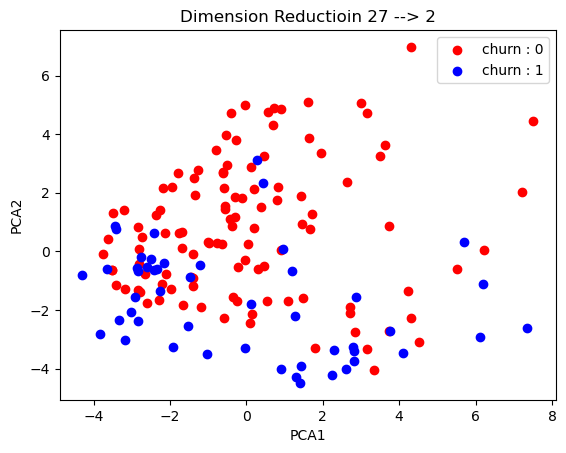

In [42]:
# 탈회를 안한 사람, 떠나지 않은 고객, churn : 0
X1,X2 = X_train_pca[y_train == 0,0], X_train_pca[y_train == 0,1]
plt.scatter(X1,X2, color="r",label="churn : 0")

# 탈회를 한 사람, 떠난 고객 churn : 1
X1,X2 = X_train_pca[y_train == 1,0], X_train_pca[y_train == 1,1]
plt.scatter(X1,X2, color="b",label="churn : 1")

# PCA1,2가 27개의 성분들이 합쳐져 있는 뭔가 축소되어 있는 그런 차원이여서 정확하게 뭘 의미하는지 모름
# --> 이걸 component가 설명해줌 --> 숫자가 큰 것은 더 많은 정보가 포함.
# 숫자가 큰 성분들이 영향을 많이 줘서 PCA 1,2를 구성.
# 전반적으로 시각화를 해보니깐 고객들이 그룹핑이 된다. 왼쪽 성분이 탈회를 비교적 잘한다. 
plt.title("Dimension Reductioin 27 --> 2")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend() 
# 잘 떠나지 않는 고객들을 한번 추려서 고객들한테는 별도의 맞춤형 마케팅을 하고 이런 전략을 세울 수가 있음
# 막연하게 27개의 차원으로만 봤을땐 복잡했는데 시각화를 해보니깐 방향성이 잡

- 차원축소된 X_train_pca 를 X1, X2 축으로 시각화  

- y_train = 0, 1 을 color 로 구분